In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
170,99,39,18,19.201294,68.305790,6.112751,87.850924,maize
2179,109,23,25,25.117110,68.480304,7.007332,194.877348,coffee
694,4,40,21,28.797281,80.457444,6.725551,44.300705,mungbean
1277,16,130,201,29.120338,82.790929,5.682395,68.850305,grapes
1669,39,9,15,25.354676,91.811832,7.992042,116.755594,orange
383,14,59,15,21.351357,22.912449,5.779090,146.454865,kidneybeans
2061,84,40,43,25.011576,88.331302,7.228268,169.416801,jute
601,8,54,20,28.334043,80.772760,7.034214,38.797641,mungbean
1284,28,145,202,19.207771,82.904284,6.484323,66.831137,grapes
1556,27,138,201,23.666821,93.901911,5.952368,105.400475,apple


In [5]:
df.shape

(2200, 8)

In [6]:
df.shape

(2200, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

 <img src='info.jpeg'/>

In [9]:
# lets check the corps present in this dataset
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
#  lets check summry of all dataset
print("Average ratio of Nitrogen in soil : {0:2f}".format(df['N'].mean()))
print("Average ratio of phasphorous in soil : {0:2f}".format(df['P'].mean()))
print("Average ratio of potasium in soil : {0:2f}".format(df['K'].mean()))
print("Average ratio of temperature in soil : {0:2f}".format(df['temperature'].mean()))
print("Average ratio of humidity in soil : {0:2f}".format(df['humidity'].mean()))
print("Average ratio of ph in soil : {0:2f}".format(df['ph'].mean()))
print("Average ratio of rainfall in soil : {0:2f}".format(df['rainfall'].mean()))

Average ratio of Nitrogen in soil : 50.551818
Average ratio of phasphorous in soil : 53.362727
Average ratio of potasium in soil : 48.149091
Average ratio of temperature in soil : 25.616244
Average ratio of humidity in soil : 71.481779
Average ratio of ph in soil : 6.469480
Average ratio of rainfall in soil : 103.463655


In [11]:
#  leat check the summary statistics for each of the crops 
@interact 
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print('-----------------------------------------------')
    print('Statistic for Nitrogen')
    print('Minimum Nitrogen required :',x['N'].min())
    print('Average Nitrogen required :',x['N'].mean())
    print('Maximum Nitrogen required :',x['N'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum phosphorous required :',x['P'].min())
    print('Average phosphorous required :',x['P'].mean())
    print('Maximum phosphorous required :',x['P'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum potassium required :',x['K'].min())
    print('Average potassium required :',x['K'].mean())
    print('Maximum potassium required :',x['K'].max())
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum Temperature required : {0:2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:2f}".format(x['temperature'].max()))
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum humidity required : {0:2f}".format(x['humidity'].min()))
    print("Average humidity required : {0:2f}".format(x['humidity'].mean()))
    print("Maximum humidity required : {0:2f}".format(x['humidity'].max()))
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum rainfall required : {0:2f}".format(x['rainfall'].min()))
    print("Average rainfall required : {0:2f}".format(x['rainfall'].mean()))
    print("Maximum rainfall required : {0:2f}".format(x['rainfall'].max()))
    print("Statistic for ph")
    print("Minimum ph required : {0:2f}".format(x['ph'].min()))
    print("Average ph required : {0:2f}".format(x['ph'].mean()))
    print("Maximum ph required : {0:2f}".format(x['ph'].max()))
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [12]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Average value for',conditions,'is {0:.1f}'.format(df[conditions].mean()))
    print("------------------------------------------------------------------------")
    print('Rice : {0:2f}'.format(df[(df['label']=='rice')][conditions].mean()))
    print('lentil : {0:2f}'.format(df[(df['label']=='lentil')][conditions].mean()))
    print('cotton : {0:2f}'.format(df[(df['label']=='cotton')][conditions].mean()))
    print('mungbean : {0:2f}'.format(df[(df['label']=='mungbean')][conditions].mean()))
    print('jute : {0:2f}'.format(df[(df['label']=='jute')][conditions].mean()))
    print('muskmelon : {0:2f}'.format(df[(df['label']=='muskmelon')][conditions].mean()))
    print('blackgram : {0:2f}'.format(df[(df['label']=='blackgram')][conditions].mean()))
    print('papaya : {0:2f}'.format(df[(df['label']=='papaya')][conditions].mean()))
    print('orange : {0:2f}'.format(df[(df['label']=='orange')][conditions].mean()))
    print('apple : {0:2f}'.format(df[(df['label']=='apple')][conditions].mean()))
    print('pigeonpeas : {0:2f}'.format(df[(df['label']=='pigeonpeas')][conditions].mean()))
    print('coffee : {0:2f}'.format(df[(df['label']=='coffee')][conditions].mean())) 
    print('maize : {0:2f}'.format(df[(df['label']=='maize')][conditions].mean()))
    print('chickpea : {0:2f}'.format(df[(df['label']=='chickpea')][conditions].mean()))
    print('pomegranate : {0:2f}'.format(df[(df['label']=='pomegranate')][conditions].mean()))
    print('kidneybeans : {0:2f}'.format(df[(df['label']=='kidneybeans')][conditions].mean()))
    print('mango : {0:2f}'.format(df[(df['label']=='mango')][conditions].mean()))
    print('banana : {0:2f}'.format(df[(df['label']=='banana')][conditions].mean()))
    print('grapes : {0:2f}'.format(df[(df['label']=='grapes')][conditions].mean()))
    print('mothbeans : {0:2f}'.format(df[(df['label']=='mothbeans')][conditions].mean()))
    print('watermelon : {0:2f}'.format(df[(df['label']=='watermelon')][conditions].mean()))
    print('coconut : {0:2f}'.format(df[df['label']=='coconut'][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [13]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("crops which required grater than average",conditions,'\n')
    print(df[df[conditions]> df[conditions].mean()]['label'].unique())
    print("-----------------------------------------------------------")
    print("crops which required less than average",conditions,'\n')
    print(df[df[conditions] < df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [14]:
# -----------------------------important 
conditions = ['N','P','K','temperature','ph','humidity','rainfall']
df[conditions].mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
ph               6.469480
humidity        71.481779
rainfall       103.463655
dtype: float64

<AxesSubplot:xlabel='N', ylabel='label'>

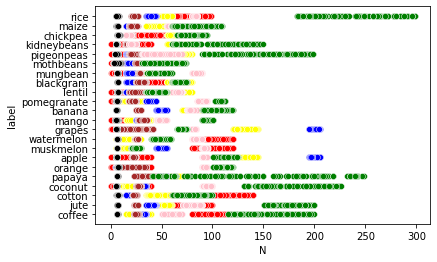

In [15]:
sns.scatterplot(data=df, x="N", y="label",color='red')
sns.scatterplot(data=df, x="P", y="label",color='yellow')
sns.scatterplot(data=df, x="K", y="label",color='blue')
sns.scatterplot(data=df, x="temperature", y="label",color='brown')
sns.scatterplot(data=df, x="humidity", y="label",color='pink')
sns.scatterplot(data=df, x="ph", y="label",color='black')
sns.scatterplot(data=df, x="rainfall", y="label",color='green')


In [16]:
pd.DataFrame(pd.crosstab(df.label[df.temperature > 30],'count',normalize=True)*100)



col_0,count
label,
blackgram,16.107383
grapes,9.060403
mango,21.812081
mothbeans,9.060403
orange,7.718121
papaya,22.818792
pigeonpeas,13.422819


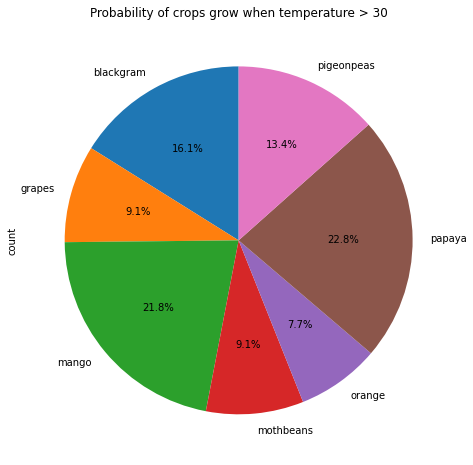

In [17]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(df.label[df.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

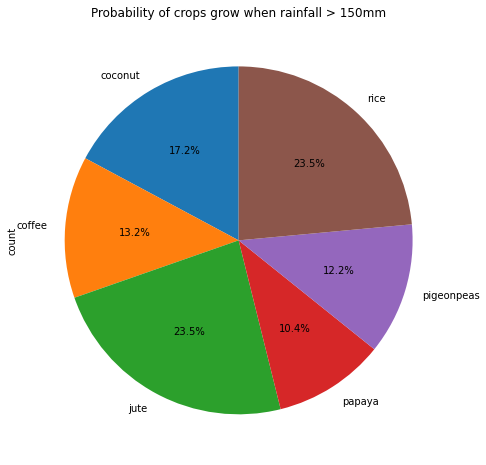

In [18]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(df.label[df.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

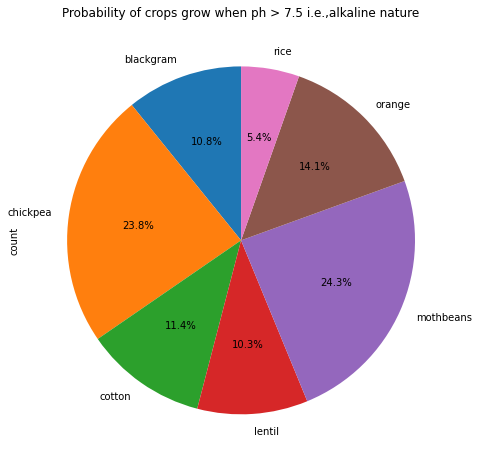

In [19]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(df.label[df.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

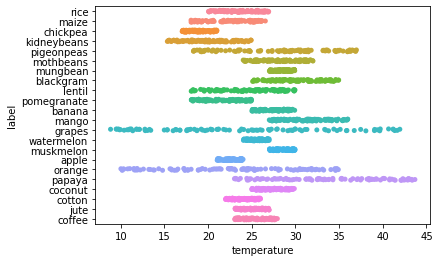

In [20]:
sns.stripplot(y ='label', x = 'temperature', data =df)
plt.show()

In [21]:
print("some interesting patterns")
print("-------------------------")
print("crops which requires very High Ratio Nitrogen Content in soil:",df[df['N']>120]['label'].unique())
print("crops which requires very High Ratio phasphorous Content in soil:",df[df['P']>100]['label'].unique())
print("crops which requires very High Ratio potassium Content in soil:",df[df['K']>200]['label'].unique())
print("crops which requires very High Rainfall :",df[df['rainfall']>200]['label'].unique())
print("crops which requires very low temperature :",df[df['temperature']<10]['label'].unique())
print("crops which requires very HIgh temperature :",df[df['temperature']>40]['label'].unique())
print("crops which requires very low humidity :",df[df['humidity']<20]['label'].unique())
print("crops which requires very low ph :",df[df['ph']<4]['label'].unique())
print("crops which requires very low ph :",df[df['ph']>9]['label'].unique())


some interesting patterns
-------------------------
crops which requires very High Ratio Nitrogen Content in soil: ['cotton']
crops which requires very High Ratio phasphorous Content in soil: ['grapes' 'apple']
crops which requires very High Ratio potassium Content in soil: ['grapes' 'apple']
crops which requires very High Rainfall : ['rice' 'papaya' 'coconut']
crops which requires very low temperature : ['grapes']
crops which requires very HIgh temperature : ['grapes' 'papaya']
crops which requires very low humidity : ['chickpea' 'kidneybeans']
crops which requires very low ph : ['mothbeans']
crops which requires very low ph : ['mothbeans']


In [22]:
print("summer crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print('---------------------------')
print("Winter crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print('---------------------------')
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())


summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------
['rice' 'papaya' 'coconut']


In [23]:
#  lets split the Dataset for predictive Modeling 

y = df['label']
x = df.drop(['label'],axis = 1)

print('shape of x: ',x.shape)
print('shape of y: ',y.shape)


shape of x:  (2200, 7)
shape of y:  (2200,)


In [24]:
# lets create training and testing sets for validation of Result
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

print('The shape of x_train', x_train.shape)
print('The shape of x_test', x_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of x_train (1760, 7)
The shape of x_test (440, 7)
The shape of y_train (1760,)
The shape of y_test (440,)


In [25]:
acc = []
model = []

# Decision Tree

In [26]:
import seaborn as sns

In [27]:
from sklearn import tree
model_Dt = tree.DecisionTreeClassifier()
model_Dt.fit(x_train,y_train)
y_pred_Dt = model_Dt.predict(x_test)

In [28]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_Dt))
model.append('Decision Tree')
Decision_Tree_Accuracy = metrics.accuracy_score(y_test, y_pred_Dt)
Decision_Tree_Accuracy

0.990909090909091

In [29]:
sum(y_pred_Dt == y_test)

436

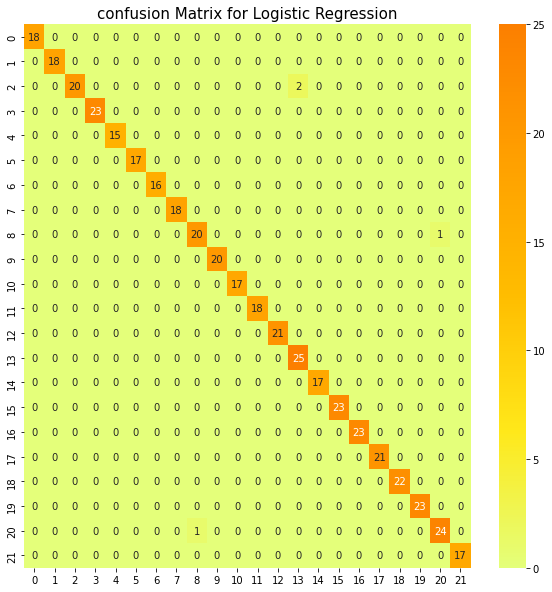

In [30]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_Dt)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [31]:
# from mlxtend.plotting import plot_decision_regions

# SVM

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

In [32]:
from sklearn.svm import SVC
model_svc = SVC(C=0.3,kernel='linear')
model_svc.fit(x_train,y_train)
y_pred_SVC = model_svc.predict(x_test)

In [33]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_SVC))
model.append('SVM')
SVM_Accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
SVM_Accuracy

0.9863636363636363

In [34]:
len(y.value_counts())

22

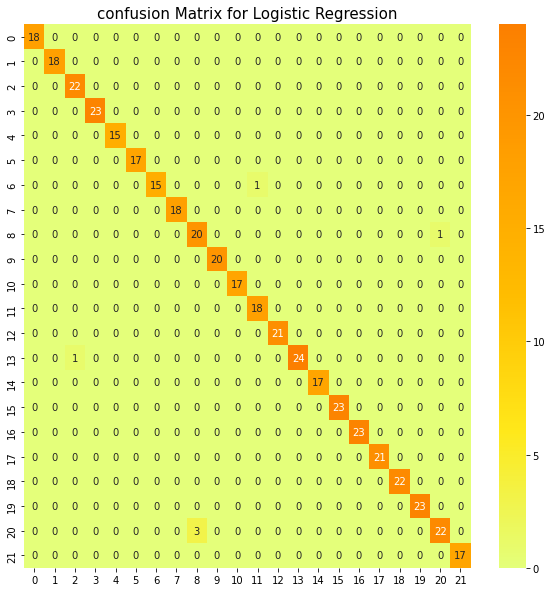

In [35]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_SVC)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

# LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

model_LG = LogisticRegression(C=0.3)
model_LG.fit(x_train,y_train)
y_pred_LG = model_LG.predict(x_test)

C:\Users\Pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_LG))
model.append('LogisticRegression')
Logistic_Regression_Accuracy = metrics.accuracy_score(y_test, y_pred_LG)
Logistic_Regression_Accuracy

0.9659090909090909

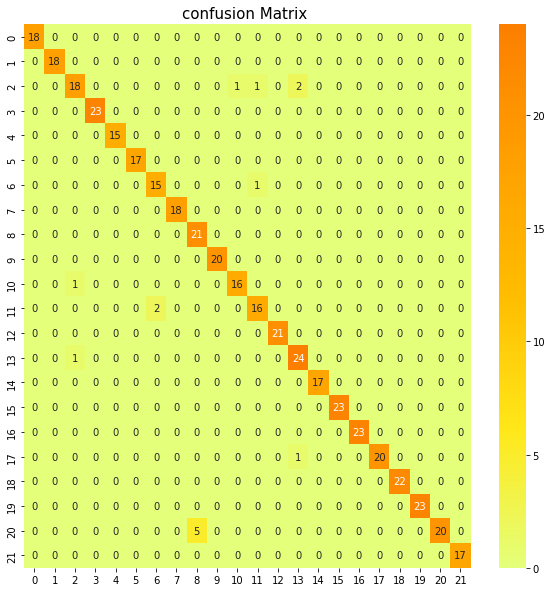

In [38]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_LG)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix ',fontsize = 15)
plt.show()

In [39]:
prediction = model_LG.predict((np.array([[108,
                                       35,
                                       30,
                                       30,
                                       70,
                                       7,
                                       180]])))
print('the suggested crop for Given climate condition is :',prediction)

the suggested crop for Given climate condition is : ['coffee']


In [40]:
predictionn = model_svc.predict((np.array([[27,120,200,21.452787,90.745319,6.110219,116.703658]])))
print('the suggested crop by SVC for Given climate condition is :',predictionn)

the suggested crop by SVC for Given climate condition is : ['apple']


In [41]:
import pickle

In [42]:
# pickle.dump(df.to_dict(),open('data_set.pkl','wb'))

In [43]:
# pickle_ut = open("model_Dt.pkl","wb")
# pickle.dump(model_Dt,pickle_ut)
# pickle_ut.close()

# RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf = RandomForestClassifier( max_depth=6, n_estimators=15) # yaha result khud khrab kia.
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [46]:
acc.append(metrics.accuracy_score(y_test, y_pred_rf))
model.append('RandomForest')
Random_Forest_Accuracy = metrics.accuracy_score(y_test,y_pred_rf)
Random_Forest_Accuracy

0.9795454545454545

In [47]:
pickle_out = open("model_rf.pkl","wb")
pickle.dump(model_rf,pickle_out)
pickle_out.close()

In [48]:
import matplotlib.pyplot as plt

## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size= 1,p= 15,n_neighbors= 5)
knn.fit(x_train, y_train)
KNN_Accuracy = knn.score(x_test, y_test)
KNN_Accuracy

0.9818181818181818

In [50]:

y_pred_knn = knn.predict(x_test)
acc.append(metrics.accuracy_score(y_test, y_pred_knn))
model.append('KNN')

In [51]:
sum(y_pred_knn == y_test)

432

In [52]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [53]:
knn.predict([[105,14,50,26.214884,87.688398,6.419052,59.655908]])

array(['watermelon'], dtype=object)

In [54]:
knn.predict_proba([[105,14,50,26.214884,87.688398,6.419052,59.655908]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]])

In [55]:
model_rf.predict([[105,14,50,26.214884,87.688398,6.419052,59.655908]])

array(['watermelon'], dtype=object)

# voting Algorithm / Ensemble Method

In [56]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(C=0.3))) 
estimator.append(('SVC', SVC(C=0.3,kernel='linear'))) 
estimator.append(('DTC',DecisionTreeClassifier(random_state=10, max_depth=100))) 
estimator.append(('RF', RandomForestClassifier( max_depth=10, n_estimators=16)))
estimator.append(('KNN', KNeighborsClassifier(leaf_size= 1,p= 15,n_neighbors= 5))) 

In [57]:
from sklearn.model_selection import cross_val_score
for estimate in estimator:
    xe=cross_val_score(estimate[1],x_train,y_train,cv=10,scoring='accuracy')
    print(estimate[0],np.round(np.mean(xe),3))

C:\Users\Pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LR 0.957
SVC 0.986
DTC 0.986
RF 0.992
KNN 0.975


In [58]:
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(x_train, y_train) 
ensemble_y_pred = hard_voting.predict(x_test) 

C:\Users\Pcs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
ensemble_accuracy = metrics.accuracy_score(y_test,ensemble_y_pred)

In [60]:
ensemble_accuracy

0.9954545454545455

In [61]:
model.append('Ensemble')
acc.append(metrics.accuracy_score(y_test, ensemble_y_pred))

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

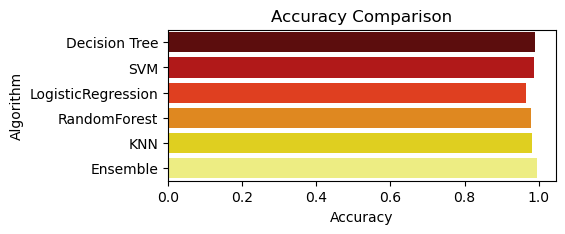

In [62]:
plt.figure(figsize=[5,2],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='hot')

In [63]:

Model_Accuracy = [['Random Forest', Random_Forest_Accuracy], ['Decision Tree', Decision_Tree_Accuracy], ['SVM', SVM_Accuracy], ['KNN', KNN_Accuracy], ['Logistic Regression', Logistic_Regression_Accuracy],['Ensemble Model',ensemble_accuracy]]
 
Accuracy = pd.DataFrame(Model_Accuracy, columns = ['MODEL', 'ACCURACY'])

Accuracy

,MODEL,ACCURACY
0,Random Forest,0.979545
1,Decision Tree,0.990909
2,SVM,0.986364
3,KNN,0.981818
4,Logistic Regression,0.965909
5,Ensemble Model,0.995455


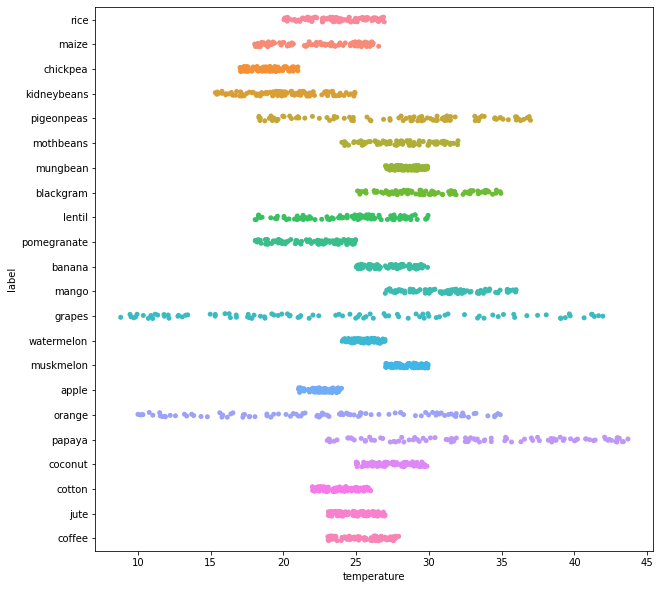

In [64]:
sns.stripplot(y ='label', x = 'temperature', data =df)
plt.show()

In [65]:

# pickle.dump(model_rf, open('modell_Rf.pkl', 'wb'))

In [66]:
# pickle.dump(knn, open('model_knn.pkl', 'wb'))

In [67]:
# param_grid = {
#     'n_estimators': list(range(1,220, 20)),
#     'max_depth': list(range(1,220, 20))
# }

# # Perform grid search on n_estimators and max_depth
# gridsearch = GridSearchCV(estimator = model_rf, param_grid=param_grid, verbose=10, scoring='accuracy')
# gridsearch.fit(x_train,y_train)

# print('Best Score: ', gridsearch.best_score_)
# print('Best Params: ', gridsearch.best_params_)

In [68]:
# from sklearn.model_selection import GridSearchCV
# #List Hyperparameters that we want to tune.
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=10)
# #Fit the model
# best_model = clf.fit(x_train,y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [69]:
# import pickle #credits to stack overflow user= blender



# with open('accuracy.pkl', 'wb') as handle:
#     pickle.dump(acc, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('model_names.pkl', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # with open('filename.pkl', 'rb') as handle:
# #     b = pickle.load(handle)

# print (a)

In [70]:
# pickle_out = open("Ensemb_M.pkl","wb")
# pickle.dump(hard_voting,pickle_out)
# pickle_out.close() 

In [71]:
# pickle.dump(df.to_dict(),open('data_set.pkl','wb'))